#### U3 L7 Project2: 
###### The purpose of this project is to compare Chest Pain Type, Resting Blood Pressure, Serum Cholestoral, Maximum Heart Rate by age group and sex.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#from plotly import __version__
#import cufflinks as cf
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
#cf.go_offline()
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:100% !important; }</style>"))


%matplotlib inline

In [2]:
#load data
df_raw = pd.read_csv("heart-disease/processed.cleveland.data.csv", low_memory=False)

In [10]:
df_raw.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_of_major_vessels,thal,diag_of_heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


### Data Cleaning

###### Renaming Columns

In [3]:
df_raw.rename(columns={'cp': 'chest_pain_type', 'trestbps':'resting_blood_pressure','chol':'serum_cholestoral', 'fbs':'fasting_blood_sugar', 'restecg':'resting_electrocardiographic_results','thalach':'maximum_heart_rate','exang':'exercise_induced_angina','ca':'num_of_major_vessels','num':'diag_of_heart_disease'}, inplace=True) 
df_raw.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'num_of_major_vessels',
       'thal', 'diag_of_heart_disease'],
      dtype='object')

### Descriptive Statistics

In [5]:
df_raw.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
resting_blood_pressure,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
serum_cholestoral,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resting_electrocardiographic_results,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
maximum_heart_rate,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


    Catagroical Colomns

In [11]:
df_cat_cols =  df_raw[['sex','chest_pain_type','fasting_blood_sugar','resting_electrocardiographic_results','exercise_induced_angina','slope','num_of_major_vessels','thal','diag_of_heart_disease']].columns

for c in df_cat_cols:
    c_counts = df_raw[c].value_counts()
    print("\n")
    c_counts

1    206
0     97
Name: sex, dtype: int64

4    144
3     86
2     50
1     23
Name: chest_pain_type, dtype: int64

0    258
1     45
Name: fasting_blood_sugar, dtype: int64

0    151
2    148
1      4
Name: resting_electrocardiographic_results, dtype: int64

0    204
1     99
Name: exercise_induced_angina, dtype: int64

1    142
2    140
3     21
Name: slope, dtype: int64

0    176
1     65
2     38
3     20
?      4
Name: num_of_major_vessels, dtype: int64

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

0    164
1     55
2     36
3     35
4     13
Name: diag_of_heart_disease, dtype: int64

    Checking for Null values

In [16]:
df_raw.isnull().sum()


age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate                      0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
num_of_major_vessels                    0
thal                                    0
diag_of_heart_disease                   0
age_group                               0
dtype: int64

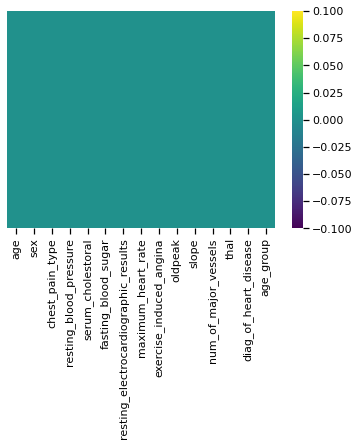

In [15]:
sns.heatmap(df_raw.isnull(), yticklabels=False, cmap="viridis")

### Data Wrangling and Visualization

    Creating new column age_group and Assign each row to group

In [12]:
df_raw.head() #before
bins= [-10,19,29,39,49,59,69,79,89,99]
labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
df_raw['age_group'] = pd.cut(df_raw['age'], bins=bins, labels=labels, include_lowest=True)
df_raw.head() #after

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_of_major_vessels,thal,diag_of_heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_of_major_vessels,thal,diag_of_heart_disease,age_group
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,60-69
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,60-69
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,60-69
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,30-39
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,40-49


    Creating a new dataframe table_hd to use to create a visuals

In [13]:
df_cp = df_raw.groupby(['age_group','sex'], as_index=False)['chest_pain_type'].median().rename(columns={'chest_pain_type':'Chest Pain Type'})

df_rb = df_raw.groupby(['age_group','sex'], as_index=False)['resting_blood_pressure'].mean().rename(columns={'resting_blood_pressure':'Resting Blood Pressure'})

df_sc = df_raw.groupby(['age_group','sex'], as_index=False)['serum_cholestoral'].mean().rename(columns={'serum_cholestoral':'Serum Cholestoral'})

df_mh = df_raw.groupby(['age_group','sex'], as_index=False)['maximum_heart_rate'].mean().rename(columns={'maximum_heart_rate':'Maximum Heart Rate'})

table_hd = pd.merge(df_cp, df_rb, how='left', on=['age_group','sex'])
#table_hd = table_hd.set_index('year')
table_hd = pd.merge(table_hd, df_sc, how='left', on=['age_group','sex'])
#table_hd = table_hd.set_index('year')
table_hd = pd.merge(table_hd, df_mh, how='left',  on=['age_group','sex'])
#table_hd = table_hd.set_index('year')



    Using dataframe table_hd to create a visualization of the comparaison of Chest Pain Type, Resting Blood Pressure, Serum Cholestoral, Maximum Heart Rate by age group and sex

,age_group,sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate
0,10-19,0,NaN,NaN,NaN,NaN
1,10-19,1,NaN,NaN,NaN,NaN
2,20-29,0,NaN,NaN,NaN,NaN
3,20-29,1,2.0,130.000000,204.000000,202.000000
4,30-39,0,3.0,121.600000,205.400000,175.000000
5,30-39,1,3.0,125.777778,227.777778,166.444444
6,40-49,0,3.0,122.842105,234.526316,158.315789
7,40-49,1,3.0,124.301887,236.320755,159.641509
8,50-59,0,3.0,135.117647,269.852941,150.882353
9,50-59,1,4.0,132.857143,239.043956,146.956044


Text(0.5, 1.0, 'Chest Pain Type (Median)')

Text(0.5, 1.0, 'Resting Blood Pressure (Avg)')

Text(0.5, 1.0, 'Serum Cholestoral (Avg)')

Text(0.5, 1.0, 'Maximum Heart Rate (Avg)')

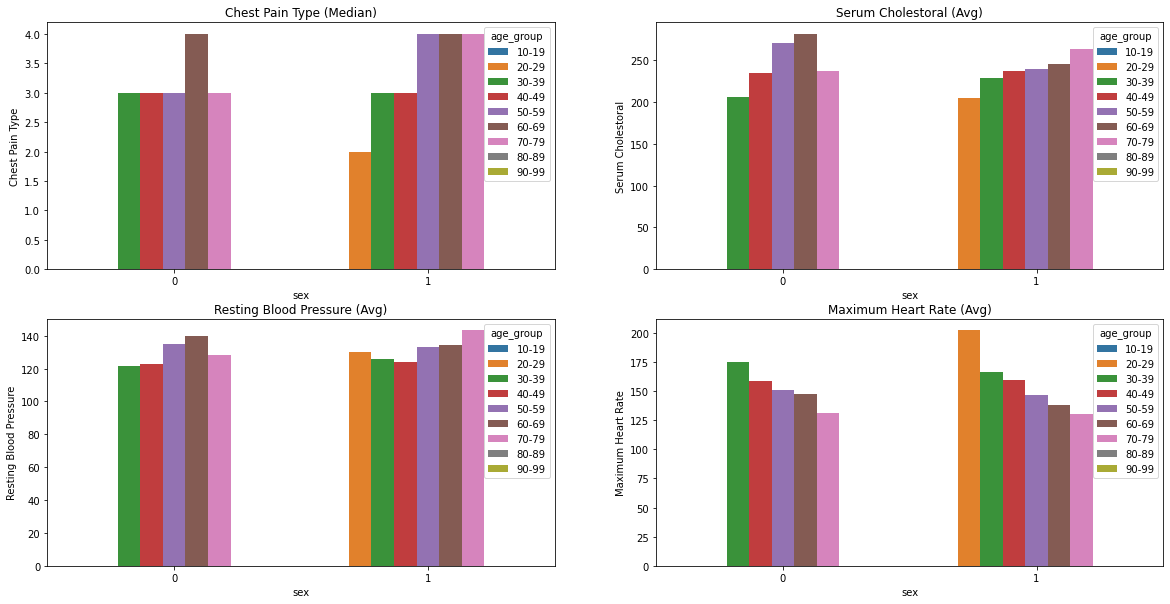

In [14]:
table_hd

fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(20,10))
sns.barplot(x="sex",  y="Chest Pain Type", hue="age_group",  data=table_hd, ax=axes[0,0]).set_title("Chest Pain Type (Median)")
sns.barplot(x="sex",  y="Resting Blood Pressure", hue="age_group",  data=table_hd, ax=axes[1,0]).set_title("Resting Blood Pressure (Avg)")
sns.barplot(x="sex",  y="Serum Cholestoral", hue="age_group",  data=table_hd, ax=axes[0,1]).set_title("Serum Cholestoral (Avg)")
sns.barplot(x="sex",  y="Maximum Heart Rate", hue="age_group",  data=table_hd, ax=axes[1,1]).set_title("Maximum Heart Rate (Avg)")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})
plt.show()